# ML_Ng Homework 3

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


##  Part 1: Loading and Visualizing Data 
We start the exercise by first loading and visualizing the dataset.
You will be working with a dataset that contains handwritten digits.

### Load Training Data

Setup the parameters you will use for this part of the exercise
20x20 Input Images of Digits
10 labels, from 1 to 10
(note that we have mapped "0" to label 10)

In [3]:
mat_contents = sio.loadmat('ex3data1.mat')
X = mat_contents['X']
y = mat_contents['y']
m,n = X.shape
num_labels = 10

### Randomly select 100 data points to display


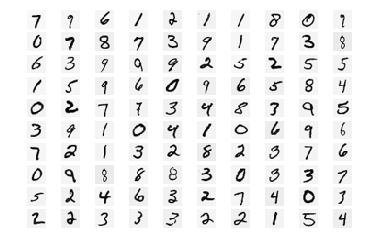

In [4]:
def display_data(X):
    plt.figure(1)
    m,n = X.shape
    example_size = int(np.sqrt(n))
    grid_size = int(np.sqrt(m))
    for i in range(m):
        plt.subplot(grid_size,grid_size,i+1)
        plt.axis('off')
        plt.imshow(X[i,:].reshape((example_size,example_size)).T, cmap='gray_r')

rand_indices = np.random.randint(m, size=(100,))
sel = X[rand_indices, :]
display_data(sel)

## Part 2a: Vectorize Logistic Regression
In this part of the exercise, you will reuse your logistic regression
code from the last exercise. Your task here is to make sure that your
regularized logistic regression implementation is vectorized. After
that, you will implement one-vs-all classification for the handwritten
digit dataset.

In [5]:
def sigmoid(z):
    g = np.zeros(np.atleast_1d(z).size)
    g = 1 / (1 + np.exp(-z))
    return g

def cost_fn(theta, X, y, lamb):
    m = y.size
    theta = np.matrix(theta).reshape((len(theta),1))
    h = sigmoid(X @ theta)
    J = 1/m * ((-y.T @ np.log(h)) - ((1 - y).T @ np.log(1 - h)))
    reg = lamb/(2*m) * np.sum(np.power(theta[1:,:],2))
    return J + reg
def grad_fn(theta, X, y, lamb):
    m = y.size
    theta = np.matrix(theta).reshape((len(theta),1))
    h = sigmoid(X @ theta)
    grad_reg = lamb/m * theta
    grad = 1/m * ((h-y).T @ X).T + grad_reg
    grad[0] = grad[0] - grad_reg[0]    
    return grad

def cost_grad_function_reg(theta, X, y, lamb):
    J = cost_fn(theta,X,y,lamb)
    grad = grad_fn(theta,X,y,lamb)
    return J, grad

Test case for lrCostFunction

In [6]:
theta_t = np.asarray([-2, -1, 1, 2]).reshape((4,1))
X_t = np.column_stack((np.ones((5,1)), np.arange(1,16).reshape((5,3), order='F')/10))
y_t = np.asarray([1, 0, 1, 0, 1]).reshape((5,1))
lambda_t = 3

J, grad = cost_grad_function_reg(theta_t, X_t, y_t, lambda_t)

print('\nCost: \n', J);
print('Expected cost: 2.534819\n');
print('Gradients:\n');
print(grad);
print('Expected gradients:\n');
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');


Cost: 
 [[2.5348194]]
Expected cost: 2.534819

Gradients:

[[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]
Expected gradients:

 0.146561
 -0.548558
 0.724722
 1.398003



### Solve using Scikit-Learn's OveVsRestClassifier

In [7]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LogisticRegression(penalty='l2', C=10)).fit(X, y)
#print( 'Coefficents: \n', classifier.coef_)
#print( 'Intercept: ', classifier.intercept_)
print(f'Accuracy: {classifier.score(X,y) * 100}%')

Accuracy: 96.5%


## Part 2: Neural Networks
### Loading parameters
In this part of the exercise, we load some pre-initialized 
neural network parameters.

In [8]:
mat_weights = sio.loadmat('ex3weights.mat')
Theta1 = mat_weights['Theta1']
Theta2 = mat_weights['Theta2']

### Implement Predict
After training the neural network, we would like to use it to predict
the labels. You will now implement the "predict" function to use the
neural network to predict the labels of the training set. This lets
you compute the training set accuracy.

In [9]:
def predict(Theta1, Theta2, X):
    m,n = X.shape
    num_labels = Theta2.shape[0]
    p = np.zeros((m,1))
    
    a1 = np.column_stack((np.ones((m,1)), X))
    a2 = sigmoid(a1 @ Theta1.T)
    a2 = np.column_stack((np.ones((m,1)), a2))
    h = sigmoid(a2 @ Theta2.T)
    # adding 1 to max index because Octave/Matlab's count starts at 1
    p = (np.argmax(h, axis = 1) + 1).reshape((m,1))
    return p

pred = predict(Theta1, Theta2, X)
print(f'Training Set Accuracy: {np.mean((pred == y) * 100)}%')

Training Set Accuracy: 97.52%


To give you an idea of the network's output, you can also run
through the examples one at the a time to see what it is predicting.

Click the button below to randomly permute examples.

In [10]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Test New Prediction")
display(button)

def on_button_clicked(b):
    rand_index = np.random.randint(m, size=(1,))
    test_next = X[rand_index, :]
    test_pred = pred[rand_index]
    plt.figure(2)
    plt.axis('off')
    plt.imshow(test_next.reshape((20,20)).T, cmap='gray_r')
    print(f'Predicted # at index {rand_index} is ', 0 if test_pred % 10 == 0 else test_pred)

button.on_click(on_button_clicked)

Button(description='Test New Prediction', style=ButtonStyle())